In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras import layers
from tensorflow.keras import Model

import matplotlib.pyplot as plt
import squarify
import seaborn as sns                            

#classifier
from sklearn import metrics

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wind-turbine-scada-dataset/T1.csv


In [2]:
df = pd.read_csv(r"/kaggle/input/wind-turbine-scada-dataset/T1.csv")

In [3]:
data = pd.read_csv(r"/kaggle/input/wind-turbine-scada-dataset/T1.csv")

In [4]:
print(df.shape)
df.head()

(50530, 5)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [6]:
df.notnull().sum()

Date/Time                        50530
LV ActivePower (kW)              50530
Wind Speed (m/s)                 50530
Theoretical_Power_Curve (KWh)    50530
Wind Direction (°)               50530
dtype: int64

In [7]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [8]:
df.notnull().tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,True,True,True,True,True
50526,True,True,True,True,True
50527,True,True,True,True,True
50528,True,True,True,True,True
50529,True,True,True,True,True


In [9]:
df.isnull().sum(axis = 0)

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [10]:
df.apply(lambda x: x.dtype)

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [11]:
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [12]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'], object: ['Date/Time']}

In [13]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

Date/Time                        0.0
LV ActivePower (kW)              0.0
Wind Speed (m/s)                 0.0
Theoretical_Power_Curve (KWh)    0.0
Wind Direction (°)               0.0
dtype: float64

In [14]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

Date/Time                        0.0
LV ActivePower (kW)              0.0
Wind Speed (m/s)                 0.0
Theoretical_Power_Curve (KWh)    0.0
Wind Direction (°)               0.0
dtype: float64

In [15]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
Date/Time,0,0.0
LV ActivePower (kW),0,0.0
Wind Speed (m/s),0,0.0


In [16]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique())

Unique Values for Each Feature: 

Date/Time : 50530
LV ActivePower (kW) : 38764
Wind Speed (m/s) : 50305
Theoretical_Power_Curve (KWh) : 37157
Wind Direction (°) : 50251


In [17]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Date/Time
['01 01 2018 00:00' '01 01 2018 00:10' '01 01 2018 00:20' ...
 '31 12 2018 23:30' '31 12 2018 23:40' '31 12 2018 23:50']


In [18]:
duplicate_datarow = df[df.duplicated()]
print("Duplicate rows: ", duplicate_datarow.shape)

Duplicate rows:  (0, 5)


In [19]:
df.isnull().any()

Date/Time                        False
LV ActivePower (kW)              False
Wind Speed (m/s)                 False
Theoretical_Power_Curve (KWh)    False
Wind Direction (°)               False
dtype: bool

In [20]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [21]:
df.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


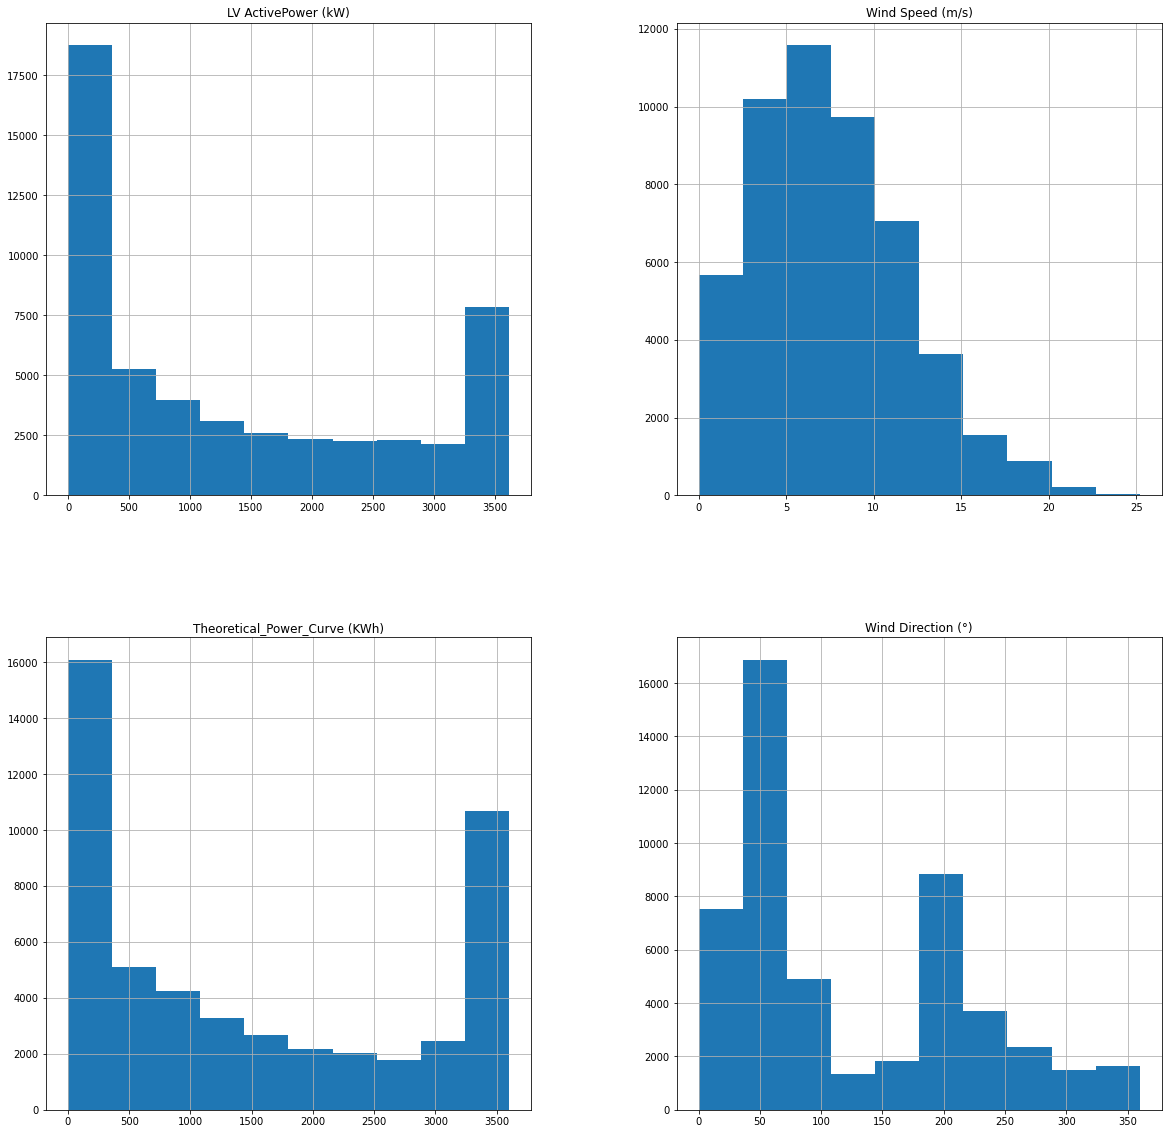

In [22]:
df.hist(figsize=(20,20))
plt.show()

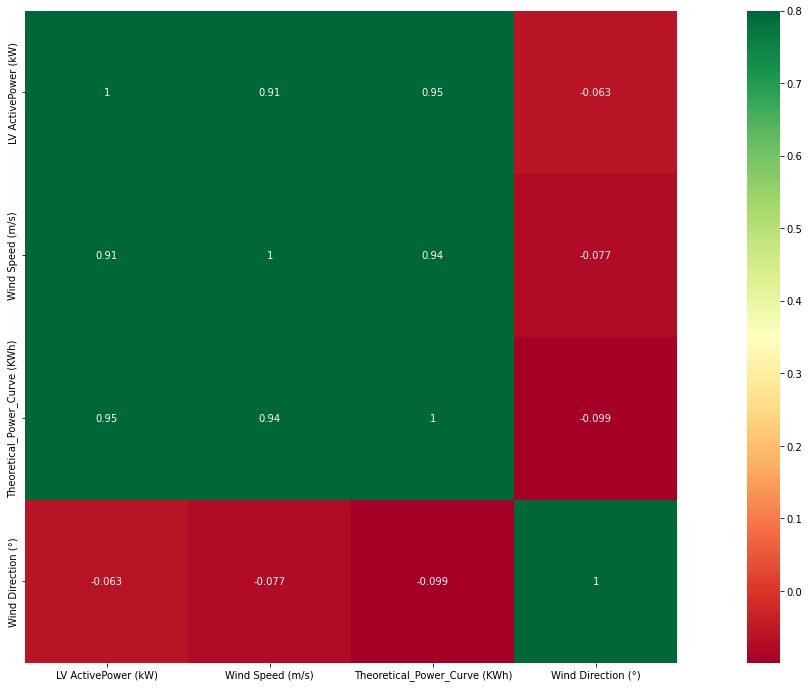

In [23]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

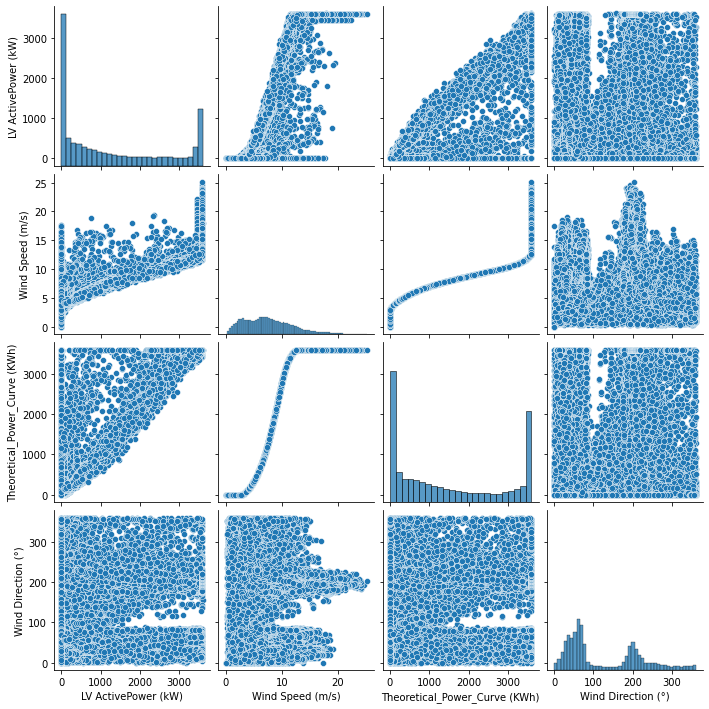

In [24]:
sns.pairplot(df)

In [25]:
df = df.dropna()
#print(df)
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [26]:
df.dropna(inplace = True)
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [27]:
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 1].values.reshape(-1, 1)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9826.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          4.36e-100
Time:                        00:16:37   Log-Likelihood:                 213.94
No. Observations:                 100   AIC:                            -423.9
Df Residuals:                      98   BIC:                            -418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0507      0.006      8.452      0.0

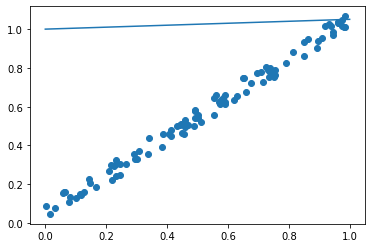

In [29]:
import statsmodels.api as sm

X = np.random.rand(100)
Y = X + np.random.rand(100)*0.1

results = sm.OLS(Y,sm.add_constant(X)).fit()

print(results.summary())

plt.scatter(X,Y)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

plt.show()

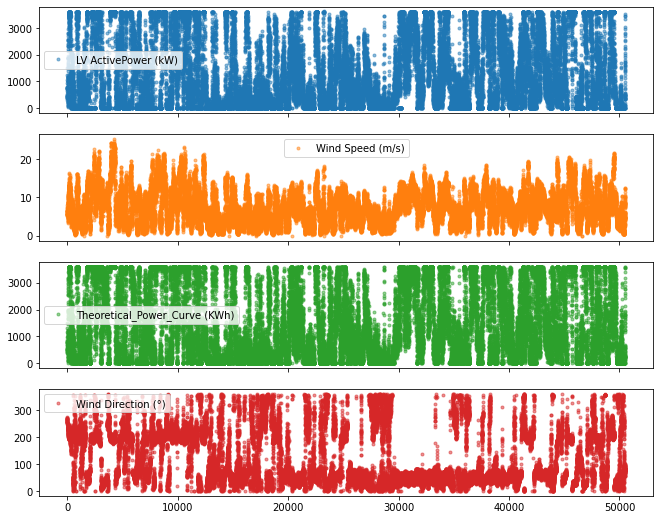

In [30]:
cols_plot = ['LV ActivePower (kW)', 'Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)','Wind Direction (°)']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [31]:
print(df['Wind Speed (m/s)'].max())
print(df['Wind Speed (m/s)'].min())

25.2060108184814
0.0


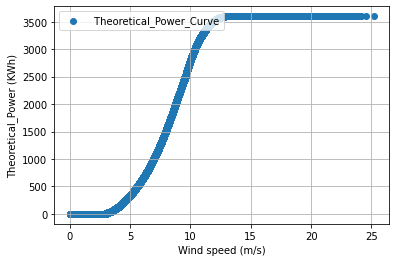

In [32]:
plt.scatter(df['Wind Speed (m/s)'],df['Theoretical_Power_Curve (KWh)'])
plt.ylabel('Theoretical_Power (KWh)')
plt.xlabel('Wind speed (m/s)')
plt.grid(True)
plt.legend([' Theoretical_Power_Curve'], loc='upper left')
plt.show()

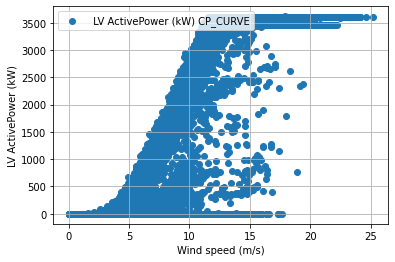

In [33]:
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'])
plt.ylabel('LV ActivePower (kW)')
plt.xlabel('Wind speed (m/s)')
plt.grid(True)
plt.legend([' LV ActivePower (kW) CP_CURVE'], loc='upper left')
plt.show()

In [34]:
df.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [35]:
#Splitting the data into categorical data and float
df_float = df[df.dtypes[df.dtypes == "float"].index]

df_Cat = df[df.dtypes[df.dtypes == "object"].index]

In [36]:
#Converting the categorical data into dummy variable for easy analysis
df_Cat = pd.get_dummies(df_Cat)

In [37]:
df_Cat.head(5)

,Date/Time_01 01 2018 00:00,Date/Time_01 01 2018 00:10,Date/Time_01 01 2018 00:20,Date/Time_01 01 2018 00:30,Date/Time_01 01 2018 00:40,Date/Time_01 01 2018 00:50,Date/Time_01 01 2018 01:00,Date/Time_01 01 2018 01:10,Date/Time_01 01 2018 01:20,Date/Time_01 01 2018 01:30,...,Date/Time_31 12 2018 22:20,Date/Time_31 12 2018 22:30,Date/Time_31 12 2018 22:40,Date/Time_31 12 2018 22:50,Date/Time_31 12 2018 23:00,Date/Time_31 12 2018 23:10,Date/Time_31 12 2018 23:20,Date/Time_31 12 2018 23:30,Date/Time_31 12 2018 23:40,Date/Time_31 12 2018 23:50
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#concatinating the two data type together
Result=df_float.join([df_Cat])

In [39]:
Result.head(5)

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date/Time_01 01 2018 00:00,Date/Time_01 01 2018 00:10,Date/Time_01 01 2018 00:20,Date/Time_01 01 2018 00:30,Date/Time_01 01 2018 00:40,Date/Time_01 01 2018 00:50,...,Date/Time_31 12 2018 22:20,Date/Time_31 12 2018 22:30,Date/Time_31 12 2018 22:40,Date/Time_31 12 2018 22:50,Date/Time_31 12 2018 23:00,Date/Time_31 12 2018 23:10,Date/Time_31 12 2018 23:20,Date/Time_31 12 2018 23:30,Date/Time_31 12 2018 23:40,Date/Time_31 12 2018 23:50
0,380.047791,5.311336,416.328908,259.994904,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,453.769196,5.672167,519.917511,268.641113,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,306.376587,5.216037,390.900016,272.564789,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,419.645905,5.659674,516.127569,271.258087,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,380.650696,5.577941,491.702972,265.674286,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
